# PSM for ice core d18O

In this tutorial, we introduce the PSM for ice core d18O in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df)

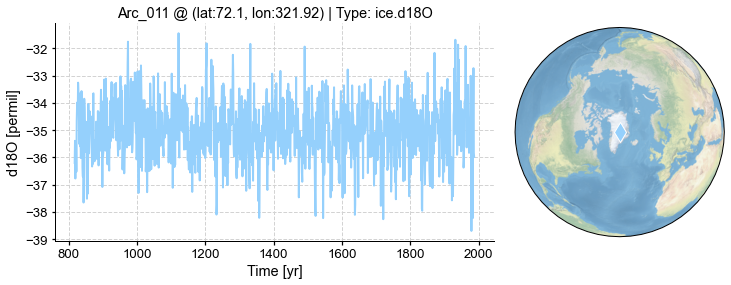

In [3]:
pobj = pdb.records['Arc_011']
fig, ax = pobj.plot()

### Model

In [4]:
%%time

dirpath = './data'

model_tas = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
model_pr = cfr.ClimateField().load_nc(os.path.join(dirpath, 'pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
model_psl = cfr.ClimateField().load_nc(os.path.join(dirpath, 'psl_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
model_d18O = cfr.ClimateField().load_nc(os.path.join(dirpath, 'd18O_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

CPU times: user 2.07 s, sys: 18.6 ms, total: 2.09 s
Wall time: 2.03 s


## Get climate data for a specific `ProxyRecord`

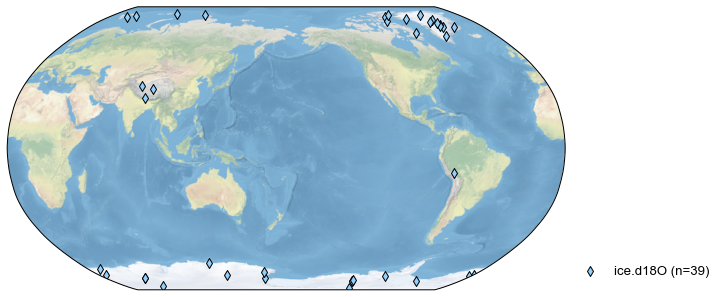

In [5]:
pdb_ice_d18O = pdb.filter(by='ptype', keys=['ice.d18O'])
fig, ax = pdb_ice_d18O.plot()

In [6]:
%%time

ppdb = cfr.ProxyDatabase()
pps = []
for pid, pobj in tqdm(pdb_ice_d18O.records.items(), total=pdb_ice_d18O.nrec):
    pobj.del_clim()
    pobj.get_clim(model_tas, tag='model')
    pobj.get_clim(model_pr, tag='model')
    pobj.get_clim(model_psl, tag='model')
    pobj.get_clim(model_d18O, tag='model')
    mdl = cfr.psm.Ice_d18O(pobj)
    pp = mdl.forward()
    pps.append(pp)

ppdb += pps

pd.to_pickle(ppdb, './data/pseudoPAGES2k/pseudo.ice.d18O.pkl')

  0%|          | 0/39 [00:00<?, ?it/s]

  3%|▎         | 1/39 [00:08<05:08,  8.11s/it]

  8%|▊         | 3/39 [00:22<04:25,  7.37s/it]

 10%|█         | 4/39 [00:29<04:12,  7.22s/it]

 13%|█▎        | 5/39 [00:38<04:22,  7.72s/it]

 18%|█▊        | 7/39 [00:53<04:11,  7.87s/it]

 21%|██        | 8/39 [01:01<03:57,  7.67s/it]

 26%|██▌       | 10/39 [01:21<04:10,  8.64s/it]

 28%|██▊       | 11/39 [01:29<03:56,  8.44s/it]

 31%|███       | 12/39 [01:37<03:47,  8.41s/it]

 38%|███▊      | 15/39 [02:01<03:17,  8.23s/it]

 41%|████      | 16/39 [02:07<02:56,  7.68s/it]

 44%|████▎     | 17/39 [02:14<02:43,  7.45s/it]

 49%|████▊     | 19/39 [02:28<02:23,  7.17s/it]

 51%|█████▏    | 20/39 [02:35<02:15,  7.15s/it]

 54%|█████▍    | 21/39 [02:42<02:05,  6.97s/it]

 56%|█████▋    | 22/39 [02:48<01:56,  6.86s/it]

 59%|█████▉    | 23/39 [02:55<01:50,  6.88s/it]

 62%|██████▏   | 24/39 [03:02<01:44,  6.96s/it]

 64%|██████▍   | 25/39 [03:09<01:37,  6.97s/it]

 72%|███████▏  | 28/39 [03:34<01:23,  7.57s/it]

 74%|███████▍  | 29/39 [03:41<01:15,  7.54s/it]

 77%|███████▋  | 30/39 [03:49<01:08,  7.61s/it]

 79%|███████▉  | 31/39 [03:56<01:00,  7.51s/it]

 82%|████████▏ | 32/39 [04:06<00:56,  8.13s/it]

 90%|████████▉ | 35/39 [04:29<00:31,  7.80s/it]

 92%|█████████▏| 36/39 [04:37<00:22,  7.65s/it]

 95%|█████████▍| 37/39 [04:45<00:15,  7.80s/it]

 97%|█████████▋| 38/39 [04:52<00:07,  7.55s/it]

100%|██████████| 39/39 [05:00<00:00,  7.69s/it]

CPU times: user 1min 5s, sys: 23.1 s, total: 1min 28s
Wall time: 5min


In [7]:
ppdb = pd.read_pickle('./data/pseudoPAGES2k/pseudo.ice.d18O.pkl')

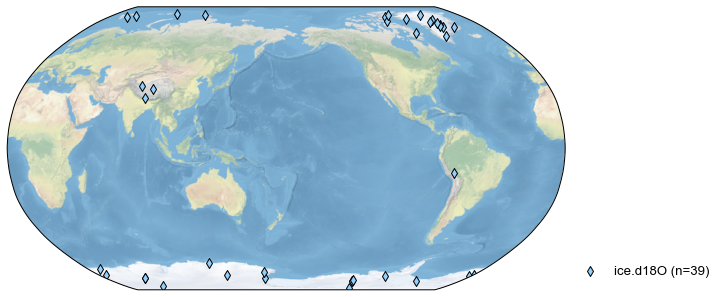

In [8]:
fig, ax = ppdb.plot()

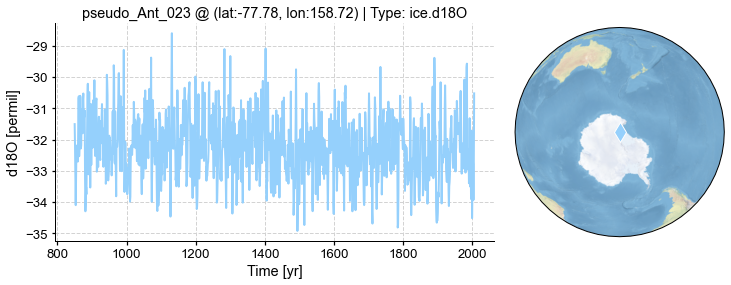

In [10]:
fig, ax = ppdb.records['pseudo_Ant_023'].plot()